In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pylab as plot
import matplotlib.pyplot as plt

# Set plotting
sns.set_style("ticks")
sns.set_palette(sns.color_palette("hls", 8))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
params = {'legend.fontsize': 15}
plot.rcParams.update(params)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)

In [2]:
def read_key_from_log(path):
    with open(path) as f:
        content = f.read().splitlines()
        
    total_agent_reward_p = []
    total_agent_scaled_reward_p = []
    total_x_axis_p = []
    total_agent_mean_reward_p = []
    inside = False
    for i in range(len(content)):
        value = content[i]
        try:
            if(value.index("Scaled Reward")):
                inside = True
                starting = value.index("Scaled Reward")+14
                agent_scaled_reward = value[starting:value.index("at")]
                total_agent_scaled_reward_p.append(float(agent_scaled_reward))
        except:
            a = 1
        if not inside:
            try:
                if(value.index("Mean Reward")):
                    inside = True
                    starting = value.index("Mean Reward")+12
                    agent_mean_reward = value[starting:value.index("at")]
                    total_agent_mean_reward_p.append(float(agent_mean_reward))
            except:
                a = 1
        if not inside:
            try:
                if(value.index("Reward")):
                    starting = value.index("Reward")+7
                    agent_reward_i = value[starting:value.index("at")]
                    total_agent_reward_p.append(float(agent_reward_i))
                    x_i = value[value.index("step")+4:]
                    total_x_axis_p.append(float(x_i))
            except:
                a = 1 
            
        inside = False
        
    return total_x_axis_p, total_agent_reward_p, total_agent_scaled_reward_p, total_agent_mean_reward_p

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [9]:
N_SEED = 3

total_agent_reward = []
total_agent_scaled_reward = []
total_agent_mean_reward = []
total_x_axis = []

for i in range(1):
    agent_reward_p = []
    agent_reward_scaled_reward_p = []
    agent_mean_reward_p = []
    total_x_axis_p = []
    for seed in range(1, N_SEED + 1):
        paths = ["data_store_baseline_custom_seed_" + str(seed)]
        path_file = paths[i]
        x_axis, agent_reward, agent_scale_reward, agent_mean_reward = read_key_from_log(path_file)
        agent_reward_p.append(agent_reward[:801])
        total_x_axis_p.append(x_axis[:801])
        agent_reward_scaled_reward_p.append(agent_scale_reward[:801])
        agent_mean_reward_p.append(agent_mean_reward[:801])
    

    total_agent_reward.append(agent_reward_p)
    total_x_axis.append(total_x_axis_p)
    total_agent_scaled_reward.append(agent_reward_scaled_reward_p)
    total_agent_mean_reward.append(agent_mean_reward_p)




(0.0, 300.0)

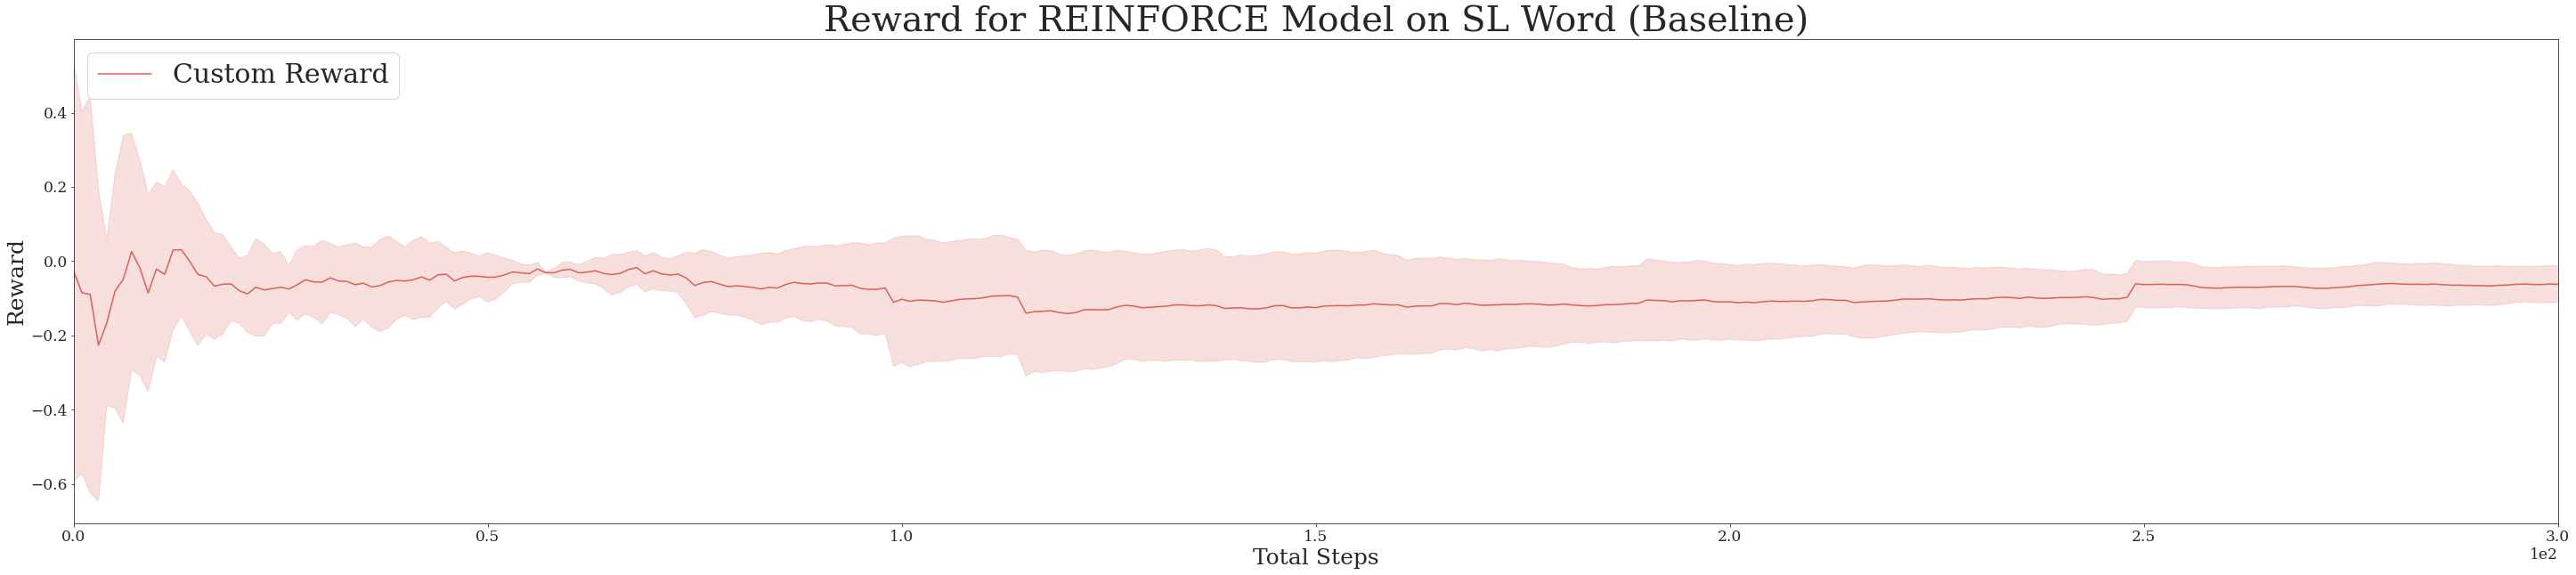

In [11]:
plt.figure(figsize=(50, 10))

legends = ["Custom Reward", "Margin Reward", "Fair Reward", "Length Reward"]
colors = [
    sns.color_palette("hls", 8)[0],
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6], 
    sns.color_palette("hls", 8)[7]]
    
for data, x_axis, legend, color in zip(total_agent_mean_reward[0:1], total_x_axis[0:1], legends, colors):
    x_values = x_axis[0]
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 2.00 * std / float(np.sqrt(N_SEED))  # 95% interval
    error = (mean - confidence, mean + confidence)
    plt.plot(x_values, mean, label=legend, color=color)      
    plt.fill_between(x_values, error[0], error[1], alpha=0.2, color=color)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
plt.legend(loc='upper left', prop={'size': 30})
plt.xlabel("Total Steps", size=25)
plt.ylabel("Reward", size=25)
plt.title("Reward for REINFORCE Model on SL Word (Baseline)", size=40)
plt.savefig("sl_word_baseline.pdf", bbox_inches="tight")
plt.xlim([0, 300])

(0.0, 300.0)

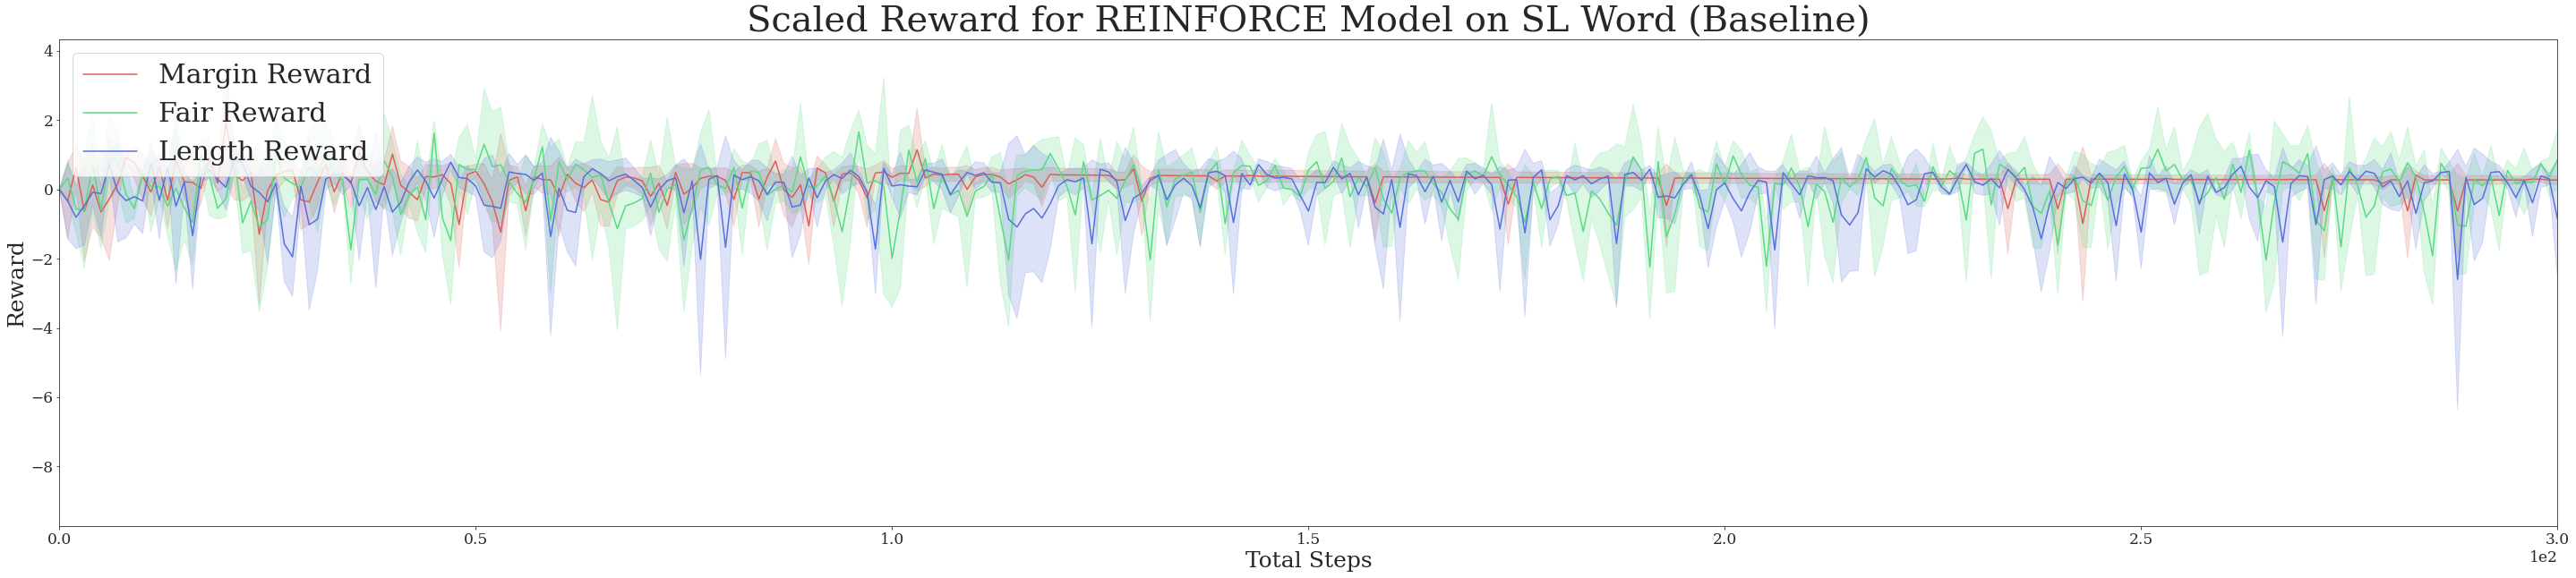

In [152]:
plt.figure(figsize=(50, 10))

legends = ["Margin Reward", "Fair Reward", "Length Reward"]
colors = [
    sns.color_palette("hls", 8)[0],
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6], 
    sns.color_palette("hls", 8)[7]]
    
for data, x_axis, legend, color in zip(total_agent_scaled_reward, total_x_axis, legends, colors):
    x_values = x_axis[0]
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 2.00 * std / float(np.sqrt(N_SEED))  # 95% interval
    error = (mean - confidence, mean + confidence)
    plt.plot(x_values, mean, label=legend, color=color)      
    plt.fill_between(x_values, error[0], error[1], alpha=0.2, color=color)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
plt.legend(loc='upper left', prop={'size': 30})
plt.xlabel("Total Steps", size=25)
plt.ylabel("Reward", size=25)
plt.title("Scaled Reward for REINFORCE Model on SL Word (Baseline)", size=40)
plt.savefig("sl_word_baseline.pdf", bbox_inches="tight")
plt.xlim([0, 300])

(0.0, 500.0)

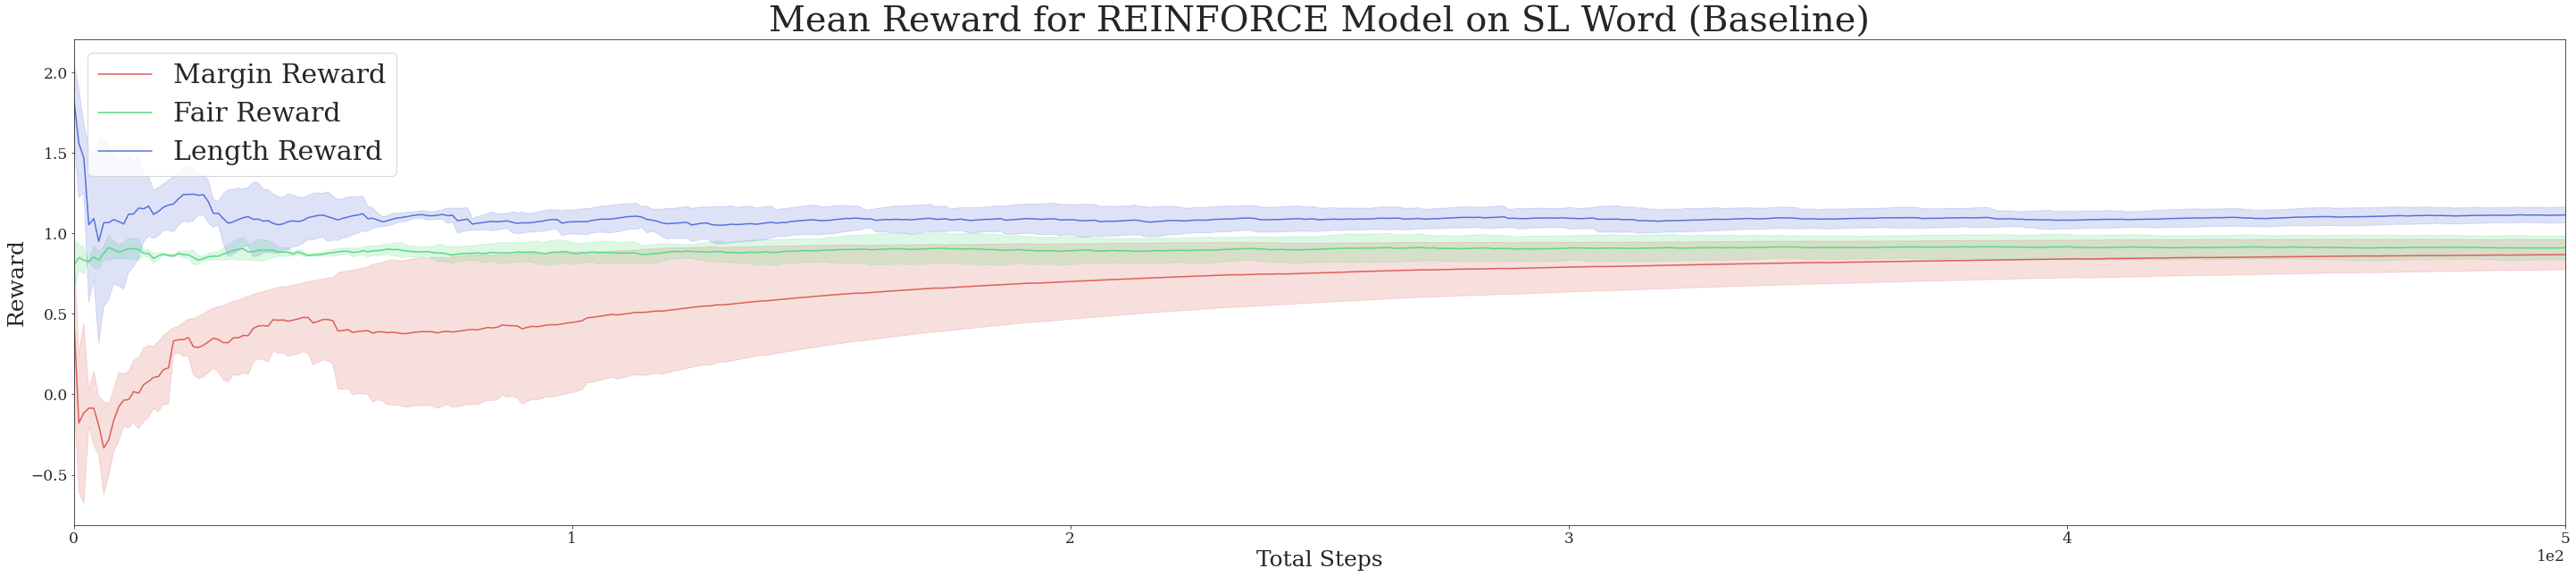

In [158]:
plt.figure(figsize=(50, 10))

legends = ["Margin Reward", "Fair Reward", "Length Reward"]
colors = [
    sns.color_palette("hls", 8)[0],
    sns.color_palette("hls", 8)[3], 
    sns.color_palette("hls", 8)[5],
    sns.color_palette("hls", 8)[6], 
    sns.color_palette("hls", 8)[7]]
    
for data, x_axis, legend, color in zip(total_agent_mean_reward, total_x_axis, legends, colors):
    x_values = x_axis[0]
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    confidence = 2.00 * std / float(np.sqrt(N_SEED))  # 95% interval
    error = (mean - confidence, mean + confidence)
    plt.plot(x_values, mean, label=legend, color=color)      
    plt.fill_between(x_values, error[0], error[1], alpha=0.2, color=color)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
plt.legend(loc='upper left', prop={'size': 30})
plt.xlabel("Total Steps", size=25)
plt.ylabel("Reward", size=25)
plt.title("Mean Reward for REINFORCE Model on SL Word (Baseline)", size=40)
plt.savefig("sl_word_baseline.pdf", bbox_inches="tight")
plt.xlim([0, 500])